In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import os 
import warnings
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pylab import rcParams

%matplotlib inline

import sklearn

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import xgboost as xgb

from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.utils import shuffle
from scipy.stats import mode
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings

In [2]:
data = pd.read_csv('D:/FV_Raw/S01_05_rev.csv')
print(data.shape)

(33926, 94)


In [3]:
var = data.drop(['L0t','Class','S_NO','D_ID','FV89','FV90'], axis=1)
target = data['Class']

min_max_scaler = MinMaxScaler()
data2_norm=min_max_scaler.fit_transform(var)
data2_norm = pd.DataFrame(data2_norm)
data_norm = data2_norm.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Class
0,0.704672,0.569560,0.478011,0.3787,0.0,0.613485,0.783795,0.783795,0.369048,0.0,...,0.085822,0.033478,0.085538,0.058413,0.030419,0.710969,0.00000,0.000000,0.497083,17
1,0.276039,0.431766,0.325844,0.7500,0.0,0.489699,0.446879,0.446879,0.000000,0.0,...,0.100576,0.020811,0.075046,0.063253,0.032340,0.780613,0.00000,0.003934,1.000000,21
2,0.180883,0.306293,0.247769,0.7500,0.0,0.376979,0.391897,0.247210,0.000000,0.0,...,0.118208,0.156714,0.223768,0.065391,0.115917,0.247516,0.01976,0.023164,1.000000,9
3,0.227390,0.350265,0.270236,0.7901,0.0,0.416482,0.391897,0.326788,0.000000,0.0,...,0.091400,0.066051,0.151460,0.039167,0.049621,0.587263,0.00000,0.002404,1.000000,21
4,0.161380,0.293215,0.247769,0.6875,0.0,0.365231,0.326788,0.326788,0.000000,0.0,...,0.005578,0.014296,0.019389,0.035678,0.002729,0.969047,0.00000,0.000000,0.497083,9


In [4]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_data2 = pca.fit_transform(data2_norm)
data2_norm2 = pd.DataFrame(new_data2)
data_norm = data2_norm2.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Class
0,0.240235,-1.169858,0.663074,0.019229,0.620195,-0.742148,0.348154,-0.373015,-0.075575,-0.128976,-0.275285,0.310400,0.193656,-0.047904,-0.133225,0.149162,0.080341,17
1,-0.225106,-0.629123,-0.091924,-0.062670,-0.266067,0.186320,0.080216,-0.201968,0.101115,0.224332,0.061510,-0.096633,0.261985,-0.049817,-0.064037,-0.040096,0.147393,21
2,-0.190383,-0.517377,-0.379907,0.399697,-0.603177,-0.109152,0.063760,-0.082697,0.496658,-0.146083,0.055157,-0.007380,-0.086956,0.069441,0.175715,-0.045392,-0.197643,9
3,-0.363851,-0.501417,-0.156138,-0.177678,0.142810,-0.444388,-0.358293,0.082453,0.159960,-0.063044,0.104709,0.137652,-0.010886,0.114063,0.020326,-0.067436,-0.050562,21
4,-0.802729,-0.378539,-0.345526,-0.114439,0.687051,-0.119308,0.034842,0.214920,-0.087094,0.053155,-0.046394,-0.264762,0.115810,0.272997,-0.048212,0.042004,0.002226,9


In [5]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Class,ClassA
0,0.240235,-1.169858,0.663074,0.019229,0.620195,-0.742148,0.348154,-0.373015,-0.075575,-0.128976,-0.275285,0.310400,0.193656,-0.047904,-0.133225,0.149162,0.080341,17,17.0
1,-0.225106,-0.629123,-0.091924,-0.062670,-0.266067,0.186320,0.080216,-0.201968,0.101115,0.224332,0.061510,-0.096633,0.261985,-0.049817,-0.064037,-0.040096,0.147393,21,21.0
2,-0.190383,-0.517377,-0.379907,0.399697,-0.603177,-0.109152,0.063760,-0.082697,0.496658,-0.146083,0.055157,-0.007380,-0.086956,0.069441,0.175715,-0.045392,-0.197643,9,9.0
3,-0.363851,-0.501417,-0.156138,-0.177678,0.142810,-0.444388,-0.358293,0.082453,0.159960,-0.063044,0.104709,0.137652,-0.010886,0.114063,0.020326,-0.067436,-0.050562,21,21.0
4,-0.802729,-0.378539,-0.345526,-0.114439,0.687051,-0.119308,0.034842,0.214920,-0.087094,0.053155,-0.046394,-0.264762,0.115810,0.272997,-0.048212,0.042004,0.002226,9,9.0


In [6]:
def func2(data_norm1) :
    if data_norm1['Class'] == 9 : return 1
    else : return 0
data_norm1['ClassA'] = data_norm1.apply(func2, axis = 1)

C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


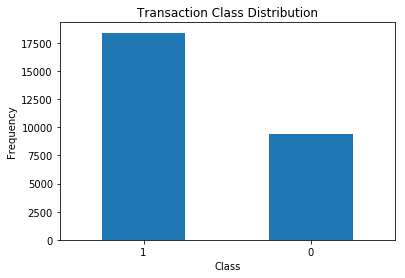

In [7]:
count_classes = pd.value_counts(data_norm1['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
X= data_norm1.drop(['Class','ClassA'], axis=1)
y= data_norm1['ClassA']

train, test = train_test_split(data_norm1, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

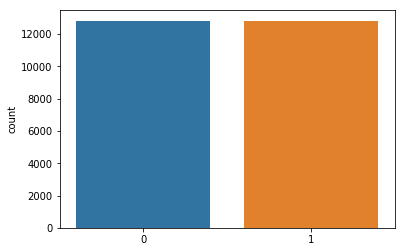

In [9]:
smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

In [10]:
x_test=x_test.values
y_test=y_test.values

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import model_selection
from mlxtend.classifier import EnsembleVoteClassifier

In [12]:
clf1 = svm.SVC(gamma = 'scale', probability=True)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)
clf3 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

print('5-fold cross validation:\n')

labels = ['SVC', 'Random Forest', 'XGBoost', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='precision')
    print("Precision: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Precision: 0.84 (+/- 0.01) [SVC]
Precision: 0.85 (+/- 0.01) [Random Forest]
Precision: 0.86 (+/- 0.01) [XGBoost]
Precision: 0.85 (+/- 0.01) [Ensemble]


C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


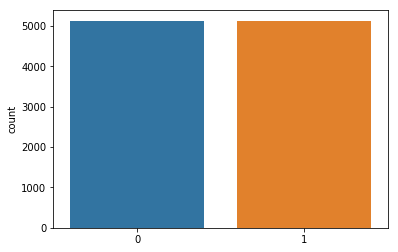

In [14]:
data_norm2 = data_norm1[data_norm1['ClassA']==0]

def func(data_norm2) :
    if data_norm2['Class'] == 21 : return 1
    else : return 0
data_norm2['ClassA'] = data_norm2.apply(func, axis = 1)

train, test = train_test_split(data_norm2, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values

In [15]:
clf1 = svm.SVC(gamma = 'scale', probability=True)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)
clf3 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

print('5-fold cross validation:\n')

labels = ['SVC', 'Random Forest', 'XGBoost', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='precision')
    print("Precision: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Precision: 0.85 (+/- 0.02) [SVC]
Precision: 0.84 (+/- 0.02) [Random Forest]
Precision: 0.82 (+/- 0.02) [XGBoost]
Precision: 0.85 (+/- 0.02) [Ensemble]


C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


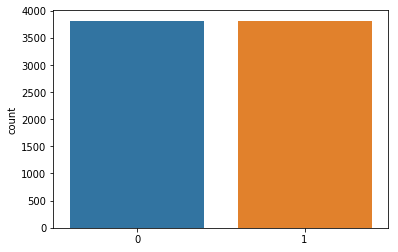

In [16]:
data_norm3 = data_norm2[data_norm2['ClassA']==0]

def func(data_norm3) :
    if data_norm3['Class'] == 17 : return 1
    else : return 0
data_norm3['ClassA'] = data_norm3.apply(func, axis = 1)

train, test = train_test_split(data_norm3, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values

In [17]:
clf1 = svm.SVC(gamma = 'scale', probability=True)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)
clf3 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

print('5-fold cross validation:\n')

labels = ['SVC', 'Random Forest', 'XGBoost', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='precision')
    print("Precision: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Precision: 0.68 (+/- 0.01) [SVC]
Precision: 0.63 (+/- 0.03) [Random Forest]
Precision: 0.58 (+/- 0.05) [XGBoost]
Precision: 0.65 (+/- 0.04) [Ensemble]


C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


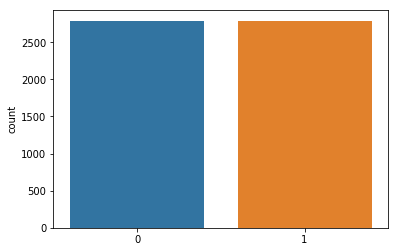

In [18]:
data_norm4 = data_norm3[data_norm3['ClassA']==0]

def func(data_norm4) :
    if data_norm4['Class'] == 16 : return 1
    else : return 0
data_norm4['ClassA'] = data_norm4.apply(func, axis = 1)

train, test = train_test_split(data_norm4, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values

In [19]:
clf1 = svm.SVC(gamma = 'scale', probability=True)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)
clf3 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

print('5-fold cross validation:\n')

labels = ['SVC', 'Random Forest', 'XGBoost', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='precision')
    print("Precision: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Precision: 0.69 (+/- 0.02) [SVC]
Precision: 0.69 (+/- 0.03) [Random Forest]
Precision: 0.65 (+/- 0.03) [XGBoost]
Precision: 0.69 (+/- 0.03) [Ensemble]


C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


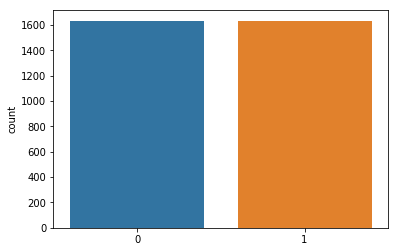

In [20]:
data_norm5 = data_norm4[data_norm4['ClassA']==0]

def func(data_norm5) :
    if data_norm5['Class'] == 198 : return 1
    else : return 0
data_norm5['ClassA'] = data_norm5.apply(func, axis = 1)

train, test = train_test_split(data_norm5, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values

In [21]:
clf1 = svm.SVC(gamma = 'scale', probability=True)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)
clf3 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

print('5-fold cross validation:\n')

labels = ['SVC', 'Random Forest', 'XGBoost', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='precision')
    print("Precision: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Precision: 0.99 (+/- 0.01) [SVC]
Precision: 0.99 (+/- 0.01) [Random Forest]
Precision: 0.98 (+/- 0.01) [XGBoost]
Precision: 0.99 (+/- 0.01) [Ensemble]


C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


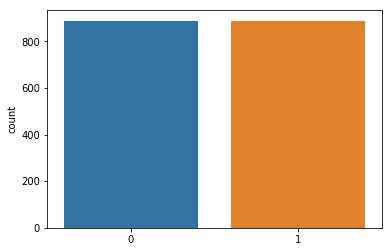

In [22]:
data_norm6 = data_norm5[data_norm5['ClassA']==0]

def func(data_norm6) :
    if data_norm6['Class'] == 76 : return 1
    else : return 0
data_norm6['ClassA'] = data_norm6.apply(func, axis = 1)

train, test = train_test_split(data_norm6, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values

In [23]:
clf1 = svm.SVC(gamma = 'scale', probability=True)
clf2 = RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0)
clf3 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

print('5-fold cross validation:\n')

labels = ['SVC', 'Random Forest', 'XGBoost', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='precision')
    print("Precision: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Precision: 0.87 (+/- 0.02) [SVC]
Precision: 0.89 (+/- 0.01) [Random Forest]
Precision: 0.88 (+/- 0.02) [XGBoost]
Precision: 0.89 (+/- 0.02) [Ensemble]
